Customer lifetime value analysis is used to estimate the total value of customers to the business over the lifetime of their relationship. It helps companies determine how much to invest in customer acquisition and retention, as well as identify the most valuable customers to prioritize for retention efforts.

By analyzing customer lifetime value, companies can identify the most effective marketing channels and campaigns for acquiring high-value customers, as well as develop targeted retention strategies to keep those customers engaged and loyal.

In [52]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data=pd.read_csv('customer_acquisition_data.csv')
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [18]:
#Distribution of Acquisition cost and revenue generated by the customer
data.dropna()
px.histogram(data,x='cost',nbins=30,title='Distribution of Acquisition cost')

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'count')

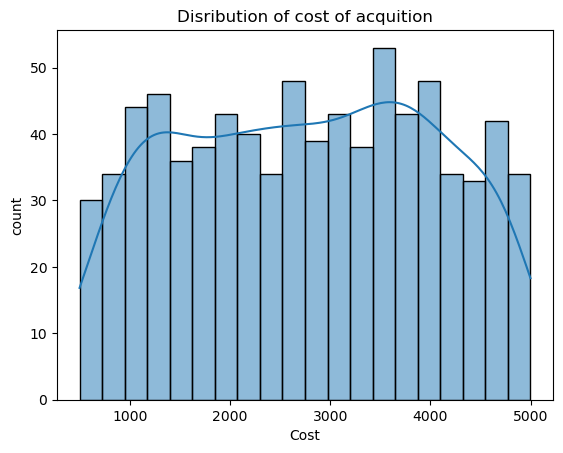

In [19]:
sns.histplot(data=data,x='revenue',bins=20,kde=True)
plt.title('Disribution of cost of acquition')
plt.xlabel('Cost')
plt.ylabel('count')

<BarContainer object of 2 artists>

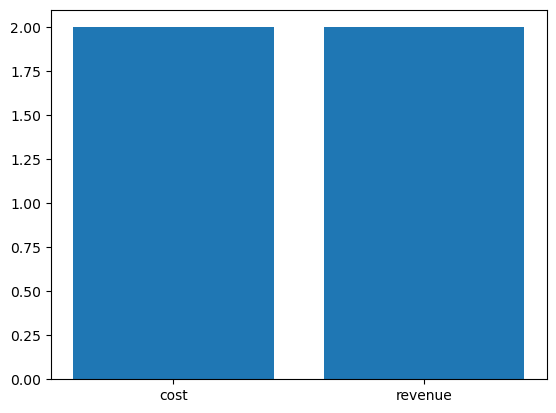

In [20]:
plt.bar(data=data,x=['cost','revenue'],height=2)

In [21]:
cost_by_channel=data.groupby('channel')['cost'].mean().reset_index()

In [22]:
cost_by_channel.head()

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


In [23]:
px.bar(cost_by_channel,x='channel',y='cost',title='Customer Acquisition by cost')

Text(0.5, 1.0, 'Customer Acquisition by cost')

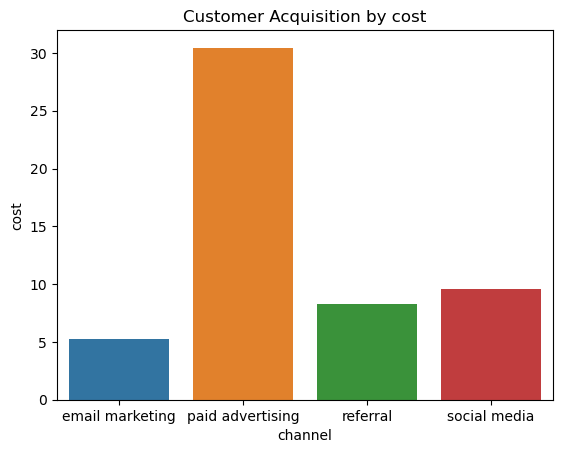

In [24]:
#plt.figure(figsize={10,6})
sns.barplot(cost_by_channel,x='channel',y='cost')
plt.xlabel('channel')
plt.ylabel('cost')
plt.title('Customer Acquisition by cost')

Text(0.5, 1.0, ' Conversion Rate by Channel')

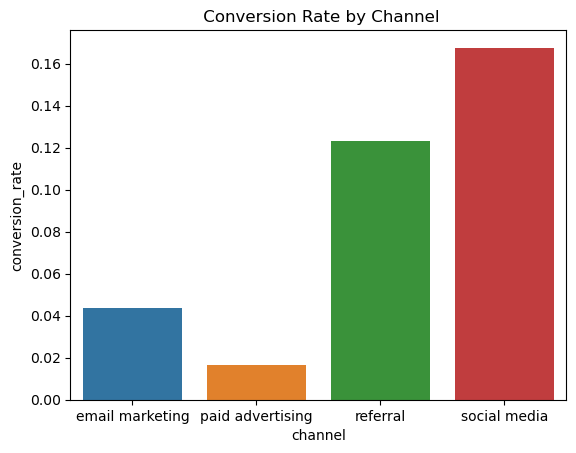

In [30]:
#channels are most and least effective at converting customers

conversion_rate_channel=data.groupby('channel')['conversion_rate'].mean().reset_index()
sns.barplot(data=conversion_rate_channel,x='channel',y='conversion_rate')
plt.title(' Conversion Rate by Channel')

In [43]:
#calculate the total revenue by channel and  most and least profitable channels in terms of generating revenue

revenue_by_channels=data.groupby('channel')['revenue'].sum().reset_index()

fig = px.pie(revenue_by_channels, 
             values='revenue', 
             names='channel', 
             title='Total Revenue by Channel', 
             hole=0.6, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

(-1.099999323245942,
 1.0999994633094188,
 -1.0999838887421465,
 1.0999929611555264)

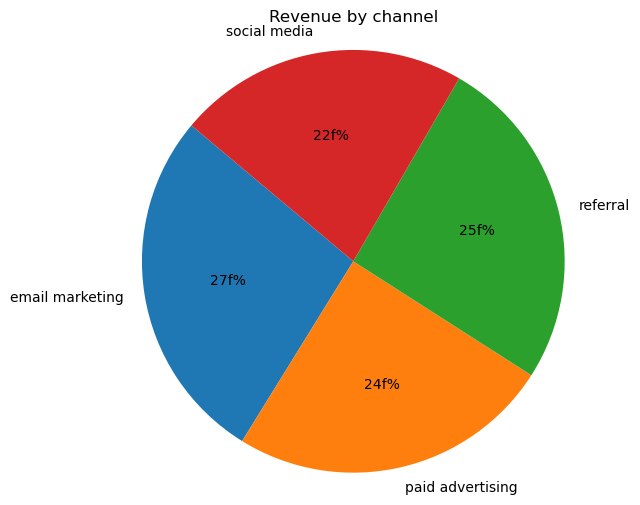

In [57]:
revenue_by_channels=data.groupby('channel')['revenue'].sum().reset_index()
plt.figure(figsize=(6,6))
sizes=[25,30,35]

plt.pie(revenue_by_channels['revenue'],labels=revenue_by_channels['channel'],autopct='%1.if%%',startangle=140)
plt.title('Revenue by channel')
plt.axis('equal')

Text(0.5, 1.0, 'Return on Investment (ROI) by Channel')

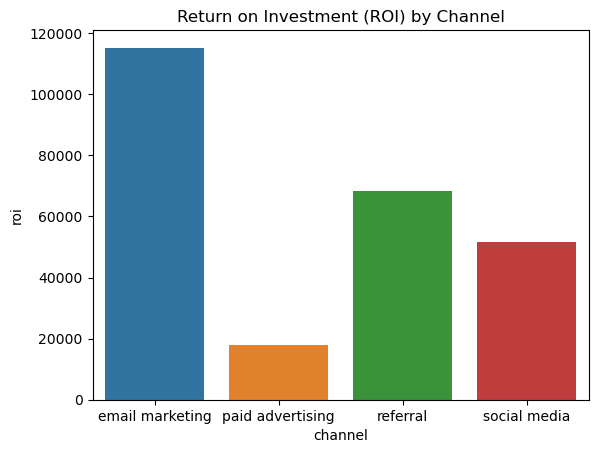

In [65]:
data['roi']=data['revenue']/data['cost']
roi_by_channel=data.groupby('channel')['roi'].sum().reset_index()
sns.barplot(roi_by_channel,x='channel',y='roi')
plt.title('Return on Investment (ROI) by Channel')


(-1.0999999713201767,
 1.0999996599077835,
 -1.09999638145906,
 1.0999927865058503)

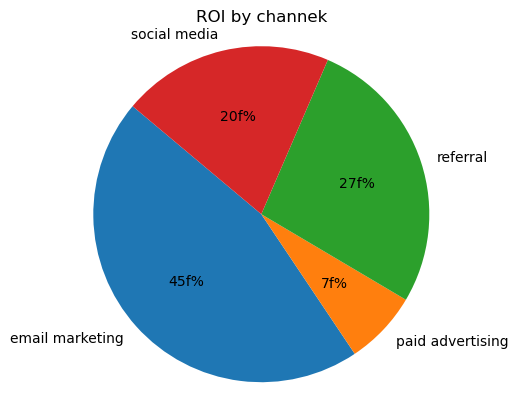

In [67]:
plt.pie(roi_by_channel['roi'],labels=revenue_by_channels['channel'],autopct='%1.if%%',startangle=140)
plt.title('ROI by channek')
plt.axis('Equal')

In [74]:
#Customer Lifetime Value - calculate the customer lifetime value from each channel.

data['cltv']=(data['revenue']-data['cost'])* data['conversion_rate'] / data['cost']
plt.figure(figsize=(8,6))

channel_cltv=data.groupby('channel')['cltv'].mean().reset_index()
fig= px.bar(channel_cltv,x='channel',y='cltv', color='channel',title='Customer Litime time value by channel')

fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')

<Figure size 800x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1e6a171df50>,
 [Text(-1.089871587122038, -0.14892925697823878, 'email marketing'),
  Text(-0.7364868454304084, -0.8170600507355417, 'paid advertising'),
  Text(0.47326957048229074, -0.9929833400694638, 'referral'),
  Text(0.2792195812654854, 1.0639720040668021, 'social media')],
 [Text(-0.5944754111574752, -0.08123414016994841, '20f%'),
  Text(-0.40172009750749543, -0.44566911858302266, '1f%'),
  Text(0.25814703844488585, -0.5416272764015256, '36f%'),
  Text(0.15230158978117384, 0.5803483658546192, '41f%')])

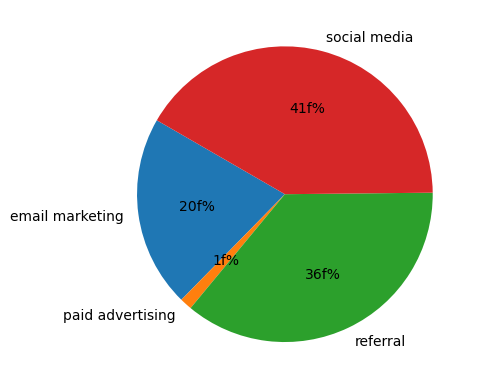

In [76]:
plt.pie(channel_cltv['cltv'],labels=channel_cltv['channel'],autopct='%1.if%%',startangle=150)

In [81]:
# compare the CLTV distributions of the social media and referral channels

subset=data.loc[data['channel'].isin(['social media','referral'])]

fig=px.box(subset,x='channel',y='cltv',title='Customer Lifetime value by channel')


fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')
fig.update_layout(legend_title='channel')
fig.show()

Text(0.5, 1.0, 'Customer Lifetime value by channel')

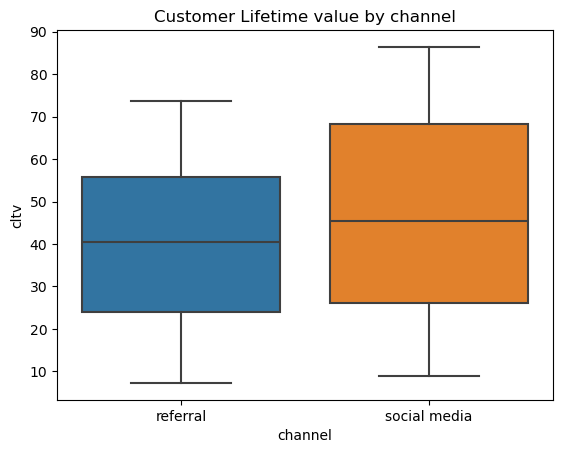

In [83]:
sns.boxplot(subset,x='channel',y='cltv')
plt.title('Customer Lifetime value by channel')